In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles

from dojo.nn import NeuralNetwork, Layer

In [2]:
X, y = make_circles(n_samples=1_000, noise=0.1, factor=0.3)

assert len(X) == len(y)

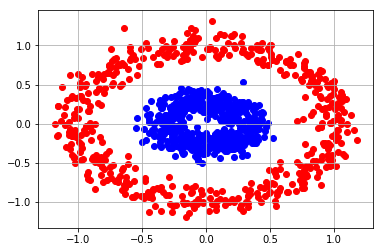

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], c="r")
plt.scatter(X[y==1, 0], X[y==1, 1], c="b")

plt.grid()
plt.show();

## Build the Neural Network

In [4]:
M, N_INPUTS = X.shape
model = NeuralNetwork(alpha=0.1, n_iterations=10_000, verbose=True)

model.add(Layer(20, N_INPUTS, activation="relu"))
model.add(Layer(20, 20, activation="relu"))
model.add(Layer(4, 20, activation="relu"))
model.add(Layer(1, 4, activation="sigmoid"))

In [5]:
model.fit(X.T, y)

Iteration 100, Cost: 0.6931471805599454
Iteration 200, Cost: 0.6931471805599454
Iteration 300, Cost: 0.6931471805599454
Iteration 400, Cost: 0.6931471805599454


KeyboardInterrupt: 

In [28]:
model.evaluate(X.T, y)

0.5